## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы: 

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации. 
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта. 

0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8. 

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import missingno as msno 

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier

1. *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [2]:
df_out = pd.read_csv('data/vehicles_dataset.csv')
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [3]:
df_out.shape

(10050, 27)

2. *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


## Data Preparation

In [4]:
df_out.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
count,1.005000e+04,10050,10050,10050,1.005000e+04,10014.000000,9665,9921,6268,5953,...,7845,7087,10048,10048,0.0,10050,9951.000000,9951.000000,10048,10050
unique,NaN,10000,393,405,NaN,NaN,39,3466,6,8,...,13,12,9081,9845,NaN,51,NaN,NaN,9957,3
top,NaN,https://roswell.craigslist.org/cto/d/artesia-1...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,NaN,ca,NaN,NaN,2021-04-13T09:11:02-0500,high
freq,NaN,2,86,86,NaN,NaN,1647,151,3134,2288,...,1981,1916,191,7,NaN,1113,NaN,NaN,3,3514
mean,7.311544e+09,NaN,NaN,NaN,2.068429e+04,2010.917815,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.590164,-94.161564,NaN,NaN
std,4.475414e+06,NaN,NaN,NaN,1.243216e+05,9.697849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.844756,18.123096,NaN,NaN
min,7.208550e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN
25%,7.308193e+09,NaN,NaN,NaN,7.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.830000,-110.447150,NaN,NaN
50%,7.312756e+09,NaN,NaN,NaN,1.574950e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39.285100,-87.999100,NaN,NaN
75%,7.315275e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.427590,-80.830000,NaN,NaN


In [5]:
df_out.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [6]:
df_out.info

<bound method DataFrame.info of                id                                                url  \
0      7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1      7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2      7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3      7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4      7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   
...           ...                                                ...   
10045  7304876387  https://chautauqua.craigslist.org/ctd/d/falcon...   
10046  7316152972  https://binghamton.craigslist.org/ctd/d/roches...   
10047  7310993818  https://salem.craigslist.org/ctd/d/salem-2011-...   
10048  7306637427  https://madison.craigslist.org/ctd/d/madison-2...   
10049  7311960763  https://norfolk.craigslist.org/ctd/d/chesapeak...   

                        region                           region_url  price  \
0                  chatta

In [7]:
df_out.head(1)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.06,-85.25,2021-04-17T12:30:50-0400,high


In [8]:
for elem in df_out.columns:
    print(f'{elem} тип {df_out[elem].dtype}')

id тип int64
url тип object
region тип object
region_url тип object
price тип int64
year тип float64
manufacturer тип object
model тип object
condition тип object
cylinders тип object
fuel тип object
odometer тип float64
title_status тип object
transmission тип object
VIN тип object
drive тип object
size тип object
type тип object
paint_color тип object
image_url тип object
description тип object
county тип float64
state тип object
lat тип float64
long тип float64
posting_date тип object
price_category тип object


### Исследование на пропуски

In [9]:
df_out[df_out.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


In [10]:
df_out[df_out.id == 7316417087]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
3383,7316417087,https://miami.craigslist.org/brw/ctd/d/fort-la...,south florida,https://miami.craigslist.org,11550,2013.0,ford,transit connect,excellent,4 cylinders,...,van,white,https://images.craigslist.org/00000_54Cnki88ck...,68k miles Financing Rates as low as 3.5% WAC. ...,NaN,fl,26.095265,-80.201169,2021-05-03T16:42:17-0400,medium
9984,7316417087,https://miami.craigslist.org/brw/ctd/d/fort-la...,south florida,https://miami.craigslist.org,11550,2013.0,ford,transit connect,excellent,4 cylinders,...,van,white,https://images.craigslist.org/00000_54Cnki88ck...,68k miles Financing Rates as low as 3.5% WAC. ...,NaN,fl,26.095265,-80.201169,2021-05-03T16:42:17-0400,medium


In [11]:
df_out = df_out.drop_duplicates()
df_out.shape

(10000, 27)

In [12]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null  

<AxesSubplot:>

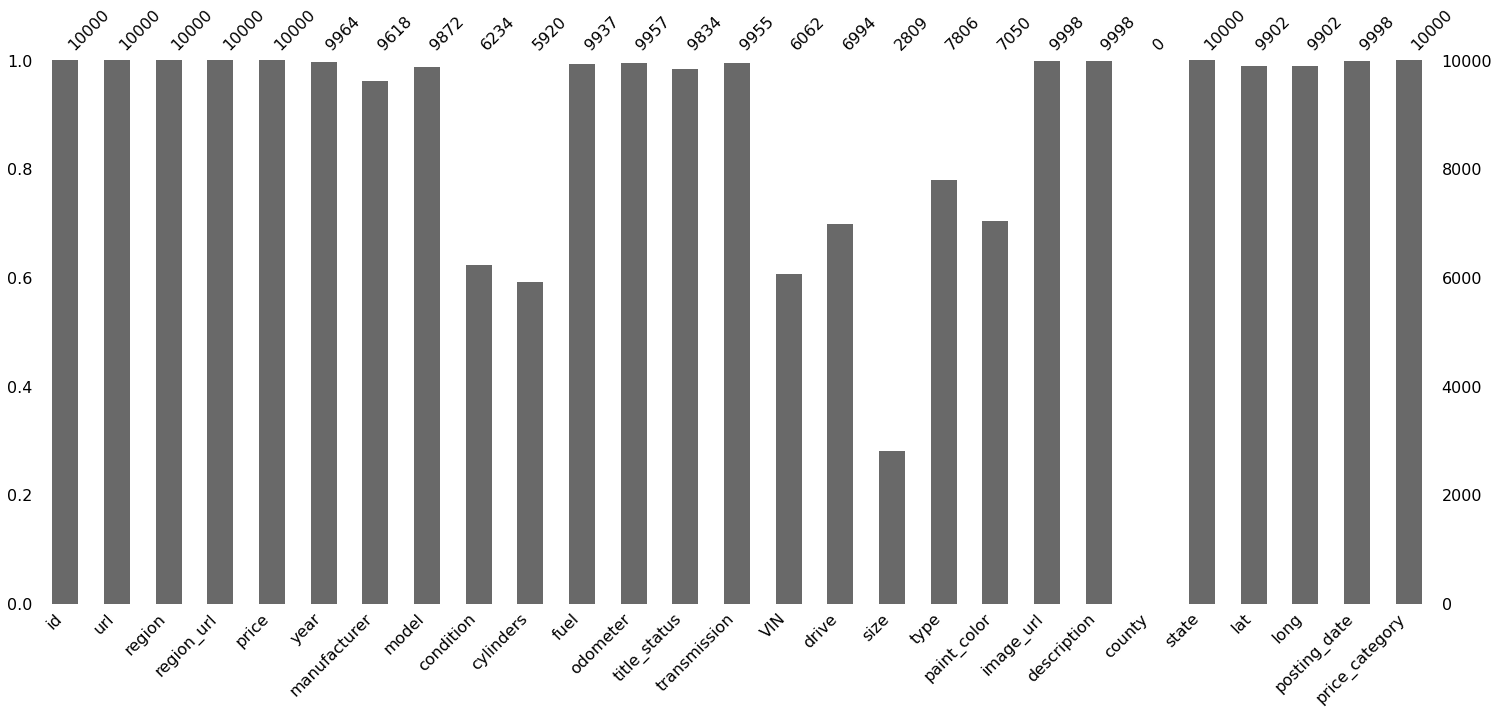

In [13]:
msno.bar(df_out)

<AxesSubplot:>

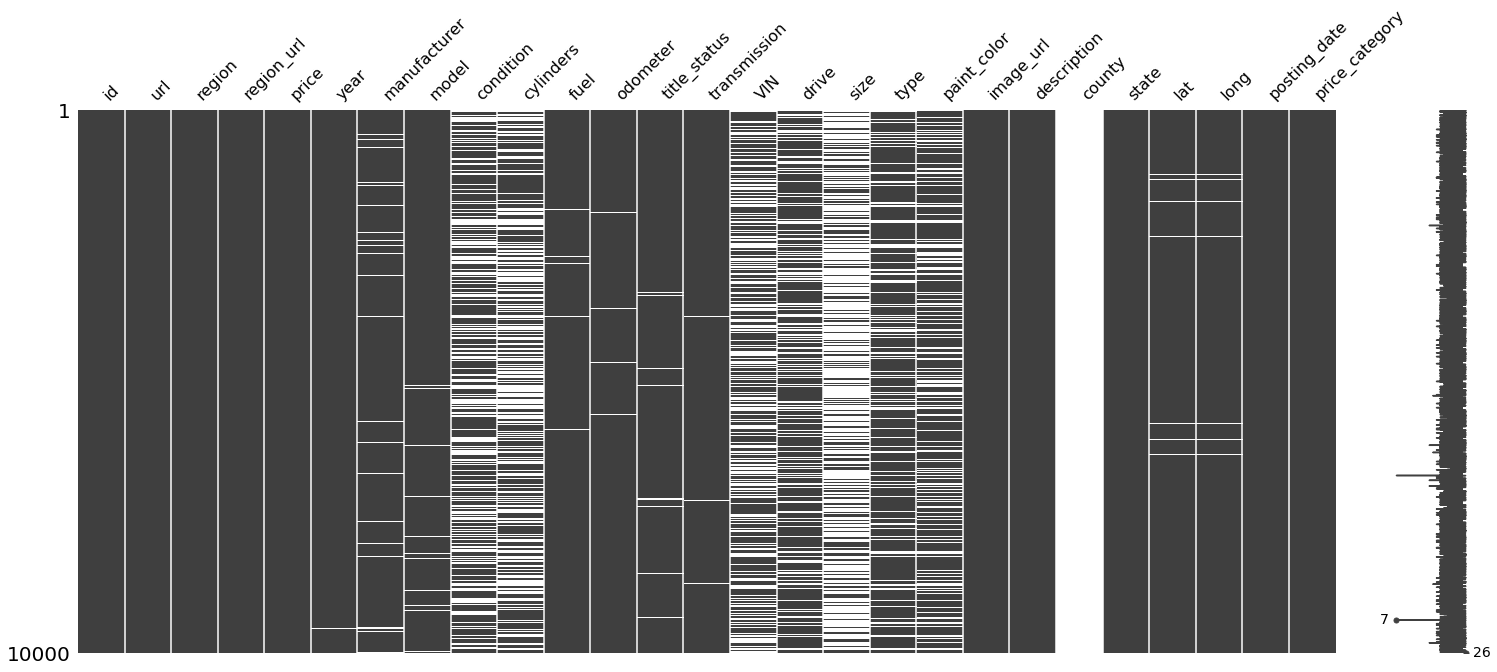

In [14]:
msno.matrix(df_out)

In [15]:
missing_values = ((df_out.isna().sum() / len(df_out)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                  0.00
state               0.00
price               0.00
price_category      0.00
region              0.00
url                 0.00
region_url          0.00
description         0.02
image_url           0.02
posting_date        0.02
year                0.36
odometer            0.43
transmission        0.45
fuel                0.63
lat                 0.98
long                0.98
model               1.28
title_status        1.66
manufacturer        3.82
type               21.94
paint_color        29.50
drive              30.06
condition          37.66
VIN                39.38
cylinders          40.80
size               71.91
county            100.00
dtype: float64

In [16]:
df_out.county.value_counts(dropna=False)

NaN    10000
Name: county, dtype: int64

In [17]:
df_out_clean = df_out.copy()
df_out_clean = df_out_clean.drop(columns=['county'])
df_out_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [18]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna())/len(df)*100, 2))

In [19]:
print_useful_rows_info(df_out_clean)

Количество полностью заполненных объектов из всей выборки:  823
Процент полностью заполненных объектов из всей выборки:  8.23


In [20]:
columns_more_20 = ['type', 'paint_color', 'drive', 'condition', 'VIN', 'cylinders', 'size']
df_out_clean = df_out_clean.drop(columns=columns_more_20)
print_useful_rows_info(df_out_clean)

Количество полностью заполненных объектов из всей выборки:  9134
Процент полностью заполненных объектов из всей выборки:  91.34


In [21]:
df_out_clean.manufacturer = df_out_clean.manufacturer.fillna('other')
df_out_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               36
manufacturer        0
model             128
fuel               63
odometer           43
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
dtype: int64

In [22]:
df_out_clean.odometer.value_counts(dropna=False)

100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: odometer, Length: 7007, dtype: int64

In [23]:
int(df_out_clean.odometer.mean())

95674

In [24]:
df_out_clean.odometer = df_out_clean.odometer.fillna(int(df_out_clean.odometer.mean()))
df_out_clean.odometer.isna().sum()

0

In [25]:
df_out_clean.year = df_out_clean.year.fillna(int(2019))
df_out_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model             128
fuel               63
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
dtype: int64

In [26]:
df_out_clean.model = df_out_clean.model.fillna('other')
df_out_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
fuel               63
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
dtype: int64

In [27]:
df_out_clean.fuel.value_counts()

gas         8402
other        730
diesel       653
hybrid       108
electric      44
Name: fuel, dtype: int64

In [28]:
df_out_clean.fuel = df_out_clean.fuel.fillna('gas')
df_out_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
fuel                0
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
dtype: int64

In [29]:
df_out_clean.title_status.value_counts()

clean         9518
rebuilt        171
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [30]:
df_out_clean.title_status = df_out_clean.title_status.fillna('clean')
df_out_clean.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
fuel               0
odometer           0
title_status       0
transmission      45
image_url          2
description        2
state              0
lat               98
long              98
posting_date       2
price_category     0
dtype: int64

In [31]:
df_out_clean.transmission.value_counts()

automatic    7700
other        1624
manual        631
Name: transmission, dtype: int64

In [32]:
df_out_clean.transmission = df_out_clean.transmission.fillna('automatic')
df_out_clean.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
fuel               0
odometer           0
title_status       0
transmission       0
image_url          2
description        2
state              0
lat               98
long              98
posting_date       2
price_category     0
dtype: int64

In [33]:
df_out_clean_2 = df_out_clean.copy()
df_out_clean_2 = df_out_clean_2.dropna()
df_out_clean_2

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000.0,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,gas,150000.0,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,gas,113573.0,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,gas,150184.0,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,hybrid,61943.0,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high


In [34]:
df_out_clean_2.isna().sum()

id                0
url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
fuel              0
odometer          0
title_status      0
transmission      0
image_url         0
description       0
state             0
lat               0
long              0
posting_date      0
price_category    0
dtype: int64

<AxesSubplot:>

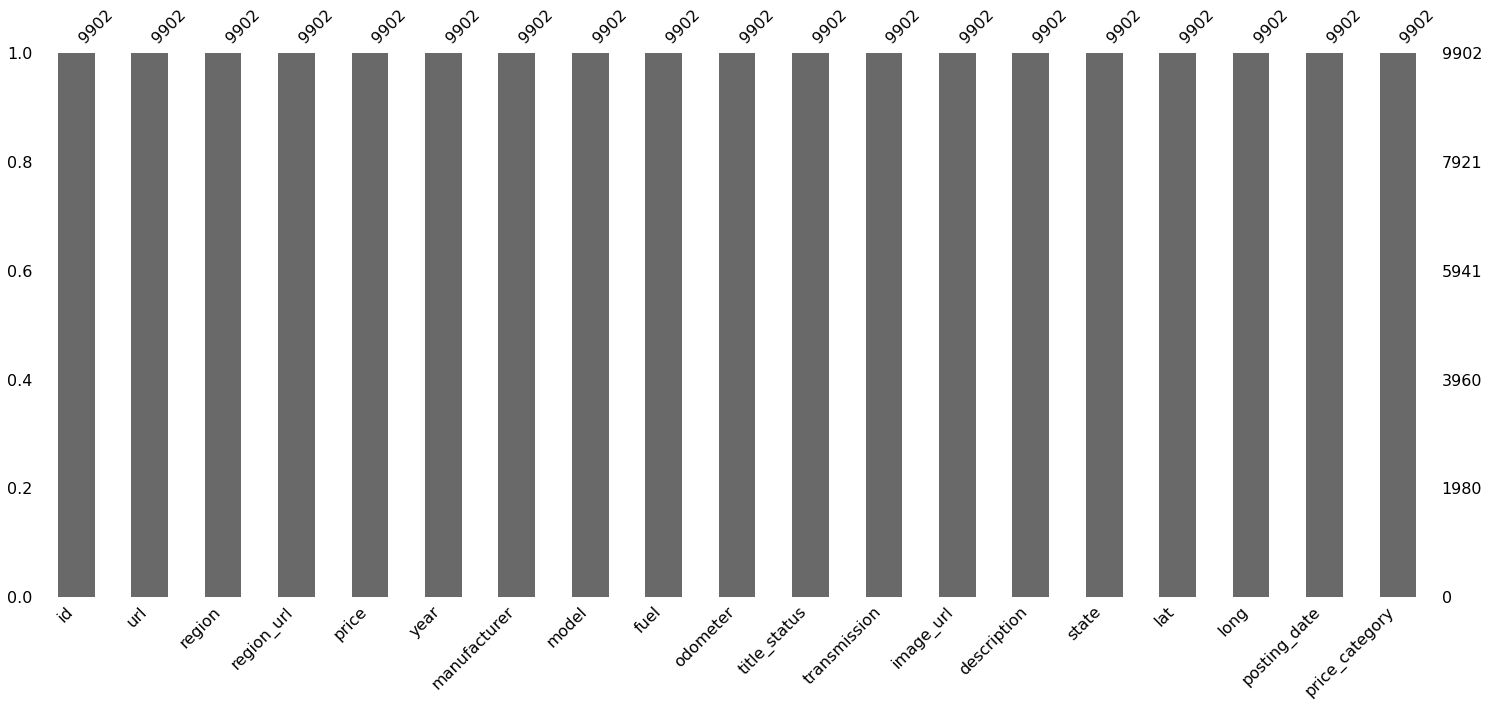

In [35]:
msno.bar(df_out_clean_2)

<AxesSubplot:>

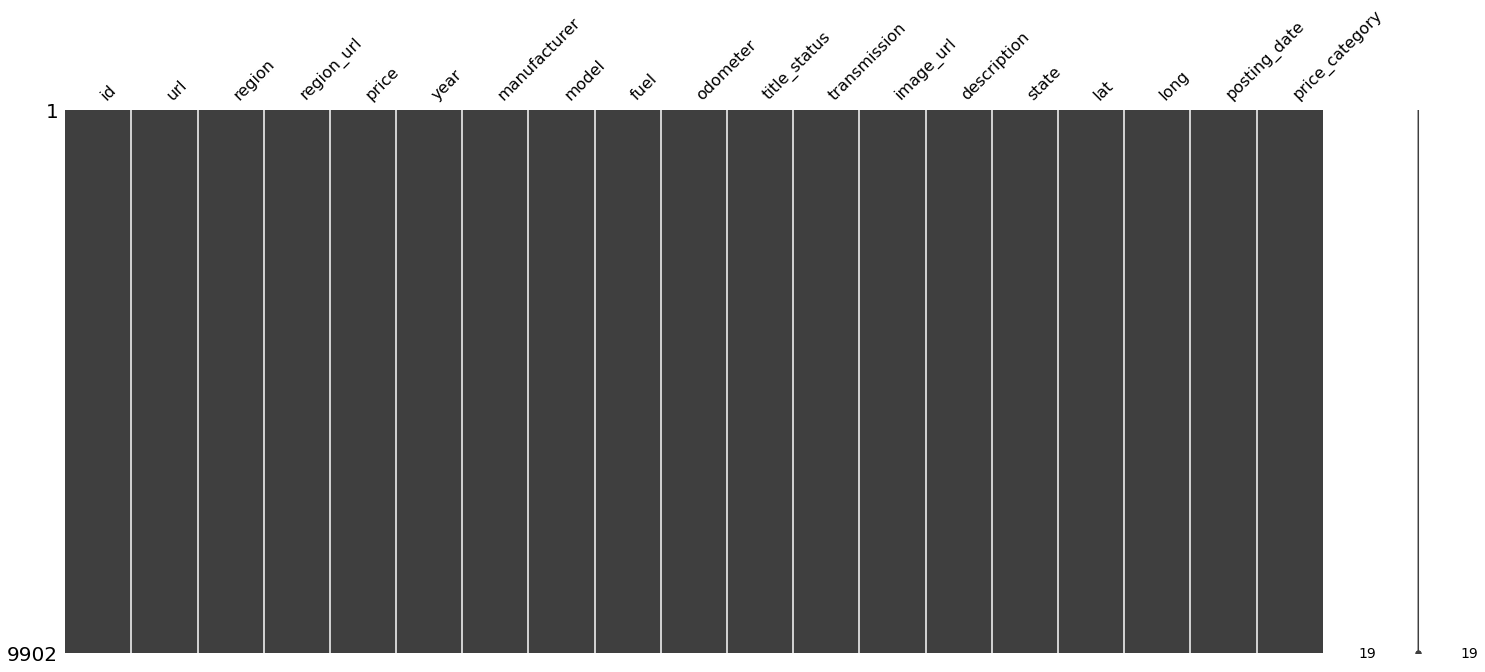

In [36]:
msno.matrix(df_out_clean_2)

### Приведение типов

In [37]:
df_out_types = df_out_clean_2.copy()

In [38]:
df_out_types.odometer.values.tolist()

[27442.0,
 60023.0,
 14048.0,
 117291.0,
 8000.0,
 80465.0,
 149000.0,
 145087.0,
 94535.0,
 87000.0,
 130000.0,
 59242.0,
 196000.0,
 156925.0,
 73562.0,
 113000.0,
 72349.0,
 73135.0,
 136142.0,
 0.0,
 108000.0,
 111111.0,
 33000.0,
 200000.0,
 110310.0,
 67200.0,
 37938.0,
 307000.0,
 94000.0,
 86496.0,
 114590.0,
 84116.0,
 193242.0,
 41759.0,
 133000.0,
 55098.0,
 39601.0,
 126000.0,
 5933.0,
 18553.0,
 112336.0,
 132758.0,
 181600.0,
 134513.0,
 217885.0,
 58693.0,
 212000.0,
 193972.0,
 158855.0,
 180000.0,
 44000.0,
 25700.0,
 10501.0,
 106740.0,
 155919.0,
 240000.0,
 67696.0,
 1.0,
 88698.0,
 177117.0,
 131350.0,
 117572.0,
 165714.0,
 25381.0,
 197000.0,
 47675.0,
 30000.0,
 165206.0,
 61520.0,
 58849.0,
 25291.0,
 46125.0,
 30139.0,
 146816.0,
 49307.0,
 157884.0,
 31315.0,
 29315.0,
 79522.0,
 80435.0,
 70110.0,
 153092.0,
 139619.0,
 11953.0,
 56977.0,
 84797.0,
 151000.0,
 64919.0,
 75239.0,
 127000.0,
 63659.0,
 113000.0,
 61000.0,
 79136.0,
 54117.0,
 55955.0,
 17799.0

In [39]:
df_out_types.odometer = df_out_types.odometer.astype(int)
print(df_out_types.odometer.dtype)

int32


In [40]:
df_out_types.posting_date.values.tolist()

['2021-04-17T12:30:50-0400',
 '2021-05-03T15:40:21-0400',
 '2021-04-28T03:52:20-0700',
 '2021-04-17T10:08:57-0400',
 '2021-05-03T18:32:06-0400',
 '2021-04-08T15:10:56-0400',
 '2021-05-04T11:59:42-0500',
 '2021-04-23T19:34:13-0400',
 '2021-04-30T17:20:30-0400',
 '2021-04-27T21:14:22-0500',
 '2021-04-30T15:20:33-0400',
 '2021-05-03T21:03:32-0400',
 '2021-04-21T13:03:14-0400',
 '2021-05-04T20:22:11-0700',
 '2021-04-08T14:36:36-0700',
 '2021-05-04T11:01:47-1000',
 '2021-04-28T19:09:23-0500',
 '2021-04-19T10:42:16-0600',
 '2021-04-23T11:02:25-0700',
 '2021-04-29T14:06:55-0400',
 '2021-05-01T15:46:41-0700',
 '2021-04-25T10:10:43-0500',
 '2021-04-25T13:28:23-0700',
 '2021-04-21T11:06:50-0400',
 '2021-05-03T13:43:57-0700',
 '2021-04-22T08:02:36-0400',
 '2021-04-11T12:11:15-0400',
 '2021-04-23T14:27:25-0500',
 '2021-04-16T19:10:16-0400',
 '2021-04-08T15:16:13-0500',
 '2021-04-22T09:16:38-0500',
 '2021-04-28T19:40:08-0700',
 '2021-04-20T10:40:15-0700',
 '2021-04-09T19:46:04-0700',
 '2021-04-22T1

In [41]:
df_out_types['date'] = pd.to_datetime(df_out_types.posting_date, utc=True)

In [42]:
df_out_types.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-05-03 22:32:06+00:00
                   ...           
10045   2021-04-10 20:33:57+00:00
10046   2021-05-03 13:36:30+00:00
10047   2021-04-22 19:14:01+00:00
10048   2021-04-14 14:14:42+00:00
10049   2021-04-24 17:50:49+00:00
Name: date, Length: 9902, dtype: datetime64[ns, UTC]

### Аномалии и выбросы

In [43]:
df_out_types.odometer.describe().apply(lambda x: f'{x:0.3f}')

count       9902.000
mean       95753.989
std        86773.160
min            0.000
25%        39003.250
50%        89000.000
75%       137000.000
max      3245000.000
Name: odometer, dtype: object

In [44]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [45]:
boundaries = calculate_outliers(df_out_types.odometer)
boundaries

(-107991.875, 283995.125)

In [46]:
is_outlier = (df_out_types.odometer < boundaries[0]) | (df_out_types.odometer > boundaries[1])
is_outlier

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Name: odometer, Length: 9902, dtype: bool

In [47]:
is_outlier.sum()/len(df_out_types)

0.00919006261361341

In [48]:
df_out_types.loc[is_outlier, 'odometer'] = int(boundaries[1])
df_out_types.odometer.describe()

count      9902.000000
mean      93385.043123
std       63337.141614
min           0.000000
25%       39003.250000
50%       89000.000000
75%      137000.000000
max      283995.000000
Name: odometer, dtype: float64

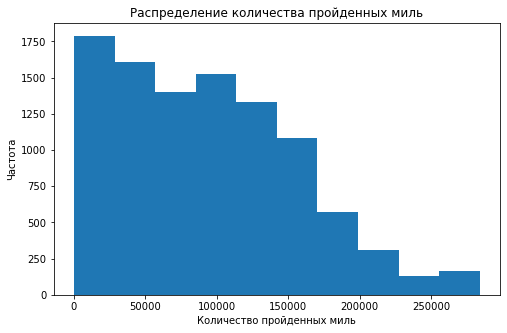

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(df_out_types.odometer)
plt.xlabel('Количество пройденных миль')
plt.ylabel('Частота')
plt.title('Распределение количества пройденных миль');

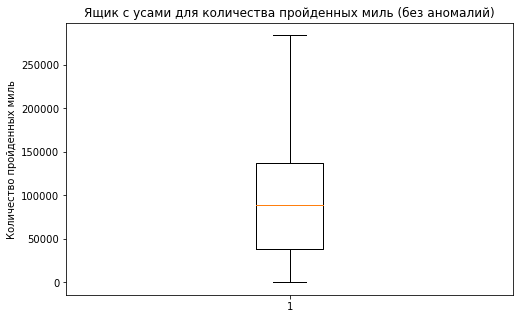

In [50]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_out_types.odometer)
plt.ylabel('Количество пройденных миль')
plt.title('Ящик с усами для количества пройденных миль (без аномалий)');

3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

## Feature engineering

In [51]:
df_out_types.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Построение признаков из строк

In [52]:
df_out_types.model.value_counts()

f-150                        148
other                        126
silverado 1500               106
1500                         100
camry                         76
                            ... 
grand caravan sport            1
Nascar                         1
titan le                       1
sorrento lx v6                 1
a3 2.0t premium plus pzev      1
Name: model, Length: 3458, dtype: int64

In [53]:
for elem in df_out_types.columns:
    print(f'{elem} тип {df_out_types[elem].dtype}')

id тип int64
url тип object
region тип object
region_url тип object
price тип int64
year тип float64
manufacturer тип object
model тип object
fuel тип object
odometer тип int32
title_status тип object
transmission тип object
image_url тип object
description тип object
state тип object
lat тип float64
long тип float64
posting_date тип object
price_category тип object
date тип datetime64[ns, UTC]


In [54]:
df_out_types['short_model'] = df_out_types.model.apply(lambda x: x.lower().split(' ')[0])
df_out_types['short_model']

0            2500
1        explorer
2            golf
3            rav4
4          altima
           ...   
10045        rav4
10046    wrangler
10047          a3
10048     cayenne
10049        1500
Name: short_model, Length: 9902, dtype: object

In [55]:
df_out_types['short_model'].nunique()

937

In [56]:
df_out_types['age_category'] =  df_out_types.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df_out_types['age_category'].value_counts()

new        4741
average    3524
old        1637
Name: age_category, dtype: int64

In [57]:
df_out_types['odometer/price'] = df_out_types.apply(lambda x: x.odometer / x.price, axis=1)
df_out_types['desc_len'] = df_out_types.apply(lambda x: len(x.description), axis=1)
df_out_types['model_in_desc'] = df_out_types.apply(lambda x: x.description.count(x.model) , axis=1)
df_out_types['model_len'] = df_out_types.apply(lambda x: len(x.model) , axis=1)
df_out_types['model_word_count'] = df_out_types.apply(lambda x: len(x.model.split(' ')), axis=1)

### Преобразование категориальных переменных

In [58]:
perem = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
for i in range(0, len(perem)):
    print(perem[i], df_out_types[perem[i]].nunique())

short_model 937
transmission 3
region 393
manufacturer 40
state 51
title_status 6
age_category 3


In [59]:
data = df_out_types[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']]
data.head()

,short_model,transmission,region,manufacturer,state,title_status,age_category
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,altima,automatic,new york city,nissan,ny,clean,new


In [60]:
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [61]:
ohe.fit(data[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']])

OneHotEncoder(sparse=False)

In [62]:
ohe_params = ohe.transform(data[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']])
ohe_params

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [63]:
ohe_params.shape

(9902, 1433)

In [64]:
ohe.get_feature_names()

array(['x0_-benz', 'x0_1', 'x0_124', ..., 'x6_average', 'x6_new',
       'x6_old'], dtype=object)

In [65]:
df_out_types[ohe.get_feature_names()] = ohe_params
df_out_types.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x4_wy,x5_clean,x5_lien,x5_missing,x5_parts only,x5_rebuilt,x5_salvage,x6_average,x6_new,x6_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
df_out_types.columns.tolist()

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'image_url',
 'description',
 'state',
 'lat',
 'long',
 'posting_date',
 'price_category',
 'date',
 'short_model',
 'age_category',
 'odometer/price',
 'desc_len',
 'model_in_desc',
 'model_len',
 'model_word_count',
 'x0_-benz',
 'x0_1',
 'x0_124',
 'x0_128i',
 'x0_135i',
 'x0_1500',
 'x0_163869',
 'x0_1928',
 'x0_1951',
 'x0_1954',
 'x0_1960s',
 'x0_1966',
 'x0_1968',
 'x0_1972',
 'x0_1977',
 'x0_1978',
 'x0_198.5',
 'x0_1988',
 'x0_1994',
 'x0_1999',
 'x0_2',
 'x0_200',
 'x0_2000',
 'x0_2002',
 'x0_2006',
 'x0_2007',
 'x0_2008',
 'x0_2009',
 'x0_2012',
 'x0_2015',
 'x0_2016',
 'x0_2017',
 'x0_2018',
 'x0_2021',
 'x0_210',
 'x0_240',
 'x0_2500',
 'x0_2500hd',
 'x0_280zx',
 'x0_3',
 'x0_3-series',
 'x0_3-window',
 'x0_3.2',
 'x0_300',
 'x0_300-series',
 'x0_300c',
 'x0_300s',
 'x0_300zx',
 'x0_3100',
 'x0_318i',
 'x0_320i',
 'x0_323i',
 'x0_

In [67]:
ohe.inverse_transform(ohe_params)

array([['2500', 'other', 'chattanooga', ..., 'tn', 'clean', 'new'],
       ['explorer', 'automatic', 'north jersey', ..., 'nj', 'clean',
        'new'],
       ['golf', 'other', 'reno / tahoe', ..., 'ca', 'clean', 'new'],
       ...,
       ['a3', 'automatic', 'salem', ..., 'or', 'clean', 'average'],
       ['cayenne', 'automatic', 'madison', ..., 'wi', 'clean', 'new'],
       ['1500', 'other', 'norfolk / hampton roads', ..., 'va', 'clean',
        'new']], dtype=object)

### Стандартизация данных

In [68]:
perem_col = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
data_2 = df_out_types[perem_col]
data_2.head()

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
0,35.060000,-85.250000,2020.0,0.499036,4482,0,22,5
1,40.821805,-74.061962,2016.0,3.542852,968,0,20,4
2,33.779214,-84.411811,2017.0,0.394718,4286,0,16,3
3,35.715954,-78.655304,2013.0,8.089034,3241,0,4,1
4,40.654800,-73.609700,2021.0,0.366972,538,0,6,1


In [69]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [70]:
std_scaler.fit(data_2)

StandardScaler()

In [71]:
std_scaled = std_scaler.transform(data_2)
std_scaled

array([[-0.604685  ,  0.49184024,  0.93424399, ..., -0.16461929,
         1.1517597 ,  1.90002724],
       [ 0.38114891,  1.10902316,  0.5218886 , ..., -0.16461929,
         0.92190683,  1.22747166],
       [-0.82382506,  0.53807855,  0.62497745, ..., -0.16461929,
         0.4622011 ,  0.55491608],
       ...,
       [ 1.08335315, -1.58966956,  0.00644435, ..., -0.16461929,
         1.496539  ,  1.90002724],
       [ 0.75889143,  0.263029  ,  0.41879975, ..., -0.16461929,
        -0.57213679, -0.79019507],
       [-0.32921706,  0.98556283,  0.62497745, ..., -0.16461929,
         1.1517597 ,  1.90002724]])

In [72]:
perem_col_std = [x + '_std' for x in perem_col]
perem_col_std

['lat_std',
 'long_std',
 'year_std',
 'odometer/price_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std']

In [73]:
df_out_types[perem_col_std] = std_scaled
df_out_types.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x6_new,x6_old,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,1.0,0.0,-0.604685,0.491840,0.934244,-0.501069,0.612802,-0.164619,1.151760,1.900027
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023,...,1.0,0.0,0.381149,1.109023,0.521889,-0.392415,-0.653647,-0.164619,0.921907,1.227472
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,1.0,0.0,-0.823825,0.538079,0.624977,-0.504793,0.542164,-0.164619,0.462201,0.554916
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,-0.492453,0.855634,0.212622,-0.230131,0.165545,-0.164619,-0.916916,-0.790195
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,...,1.0,0.0,0.352575,1.133972,1.037333,-0.505783,-0.808619,-0.164619,-0.687063,-0.790195


### MinMax - нормализация данных

In [74]:
data_latlong = df_out_types[['lat', 'long']]
data_latlong.head()

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,40.654800,-73.609700


In [75]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(data_latlong)
mm_scaler = mm_scaler.transform(data_latlong)
perem_col_mm = ['lat_mm', 'long_mm']
df_out_types[perem_col_mm] = mm_scaler
df_out_types.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,-0.604685,0.491840,0.934244,-0.501069,0.612802,-0.164619,1.151760,1.900027,0.773737,0.219365
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023,...,0.381149,1.109023,0.521889,-0.392415,-0.653647,-0.164619,0.921907,1.227472,0.817357,0.253069
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,-0.823825,0.538079,0.624977,-0.504793,0.542164,-0.164619,0.462201,0.554916,0.764041,0.221890
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,-0.492453,0.855634,0.212622,-0.230131,0.165545,-0.164619,-0.916916,-0.790195,0.778703,0.239231
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,...,0.352575,1.133972,1.037333,-0.505783,-0.808619,-0.164619,-0.687063,-0.790195,0.816092,0.254431


In [76]:
perem_geo = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
df_out_types[perem_geo]

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.604685,0.773737,-85.250000,0.491840,0.219365
1,40.821805,0.381149,0.817357,-74.061962,1.109023,0.253069
2,33.779214,-0.823825,0.764041,-84.411811,0.538079,0.221890
3,35.715954,-0.492453,0.778703,-78.655304,0.855634,0.239231
4,40.654800,0.352575,0.816092,-73.609700,1.133972,0.254431
...,...,...,...,...,...,...
10045,42.123900,0.603935,0.827214,-79.189500,0.826165,0.237622
10046,43.216990,0.790961,0.835489,-77.755610,0.905265,0.241942
10047,44.925908,1.083353,0.848427,-122.982753,-1.589670,0.105697
10048,43.029559,0.758891,0.834070,-89.397796,0.263029,0.206870


In [77]:
df_out_types[perem_geo].describe()

,lat,lat_std,lat_mm,long,long_std,long_mm
count,9902.000000,9.902000e+03,9902.000000,9902.000000,9.902000e+03,9902.000000
mean,38.594142,6.145974e-16,0.800492,-94.165877,9.222857e-16,0.192506
std,5.844895,1.000050e+00,0.044249,18.128504,1.000050e+00,0.054611
min,-67.144243,-1.809164e+01,0.000000,-158.069300,-3.525203e+00,0.000000
25%,34.830368,-6.439746e-01,0.771998,-110.322086,-8.912497e-01,0.143836
50%,39.298522,1.205182e-01,0.805825,-88.000050,3.401350e-01,0.211081
75%,42.428070,6.559778e-01,0.829517,-80.830000,7.356675e-01,0.232680
max,64.947500,4.509010e+00,1.000000,173.885502,1.478693e+01,1.000000


In [78]:
df_out_types[perem_geo].corr()

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.163514,-0.163514,-0.163514
lat_std,1.000000,1.000000,1.000000,-0.163514,-0.163514,-0.163514
lat_mm,1.000000,1.000000,1.000000,-0.163514,-0.163514,-0.163514
long,-0.163514,-0.163514,-0.163514,1.000000,1.000000,1.000000
long_std,-0.163514,-0.163514,-0.163514,1.000000,1.000000,1.000000
long_mm,-0.163514,-0.163514,-0.163514,1.000000,1.000000,1.000000


### Признаки на основе дат

In [79]:
df_out_types[['posting_date', 'date']]

,posting_date,date
0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
4,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00
...,...,...
10045,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
10046,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
10047,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
10048,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


In [80]:
df_out_types['date'] = pd.to_datetime(df_out_types['date'])
df_out_types[['date']].value_counts()

date                     
2021-04-22 15:01:24+00:00    3
2021-04-08 15:06:02+00:00    2
2021-05-02 12:34:05+00:00    2
2021-04-19 14:00:54+00:00    2
2021-04-30 20:19:45+00:00    2
                            ..
2021-04-21 00:30:25+00:00    1
2021-04-21 00:36:24+00:00    1
2021-04-21 00:45:06+00:00    1
2021-04-21 00:46:29+00:00    1
2021-05-05 03:26:24+00:00    1
Length: 9816, dtype: int64

In [81]:
df_out_types['month'] = df_out_types['date'].dt.month
df_out_types['month']

0        4
1        5
2        4
3        4
4        5
        ..
10045    4
10046    5
10047    4
10048    4
10049    4
Name: month, Length: 9902, dtype: int64

In [82]:
df_out_types['dayofweek'] = df_out_types['date'].dt.weekday
df_out_types['dayofweek']

0        5
1        0
2        2
3        5
4        0
        ..
10045    5
10046    0
10047    3
10048    2
10049    5
Name: dayofweek, Length: 9902, dtype: int64

In [83]:
df_out_types['diff_years'] = df_out_types['date'].dt.year - df_out_types['year']
df_out_types['diff_years']

0         1.0
1         5.0
2         4.0
3         8.0
4         0.0
         ... 
10045    19.0
10046    13.0
10047    10.0
10048     6.0
10049     4.0
Name: diff_years, Length: 9902, dtype: float64

In [84]:
std_perem = StandardScaler()
std_perem.fit(df_out_types[['month', 'dayofweek', 'diff_years']])
std_perem_scaled = std_perem.transform(df_out_types[['month', 'dayofweek', 'diff_years']])
perem_col_perem_std = ['month_std', 'dayofweek_std', 'diff_years_std']
df_out_types[perem_col_perem_std] = std_perem_scaled
df_out_types.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,model_len_std,model_word_count_std,lat_mm,long_mm,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,1.151760,1.900027,0.773737,0.219365,4,5,1.0,-0.614470,1.119239,-0.934244
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,gas,60023,...,0.921907,1.227472,0.817357,0.253069,5,0,5.0,1.627418,-1.375966,-0.521889
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.462201,0.554916,0.764041,0.221890,4,2,4.0,-0.614470,-0.377884,-0.624977
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,-0.916916,-0.790195,0.778703,0.239231,4,5,8.0,-0.614470,1.119239,-0.212622
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,...,-0.687063,-0.790195,0.816092,0.254431,5,0,0.0,1.627418,-1.375966,-1.037333


### Сохранение датафрейма для этапа моделирования

In [85]:
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 
                    'odometer/price',
                    'desc_len', 'model_in_desc', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df_prepared = df_out_types.drop(columns_for_drop, axis = 1)
df_prepared.head()

,id,price,price_category,x0_-benz,x0_1,x0_124,x0_128i,x0_135i,x0_1500,x0_163869,...,lat_std,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.604685,0.491840,0.934244,0.612802,-0.164619,1.151760,1.900027,-0.614470,1.119239,-0.934244
1,7316380095,16942,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.381149,1.109023,0.521889,-0.653647,-0.164619,0.921907,1.227472,1.627418,-1.375966,-0.521889
2,7313733749,35590,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.823825,0.538079,0.624977,0.542164,-0.164619,0.462201,0.554916,-0.614470,-0.377884,-0.624977
3,7308210929,14500,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.492453,0.855634,0.212622,0.165545,-0.164619,-0.916916,-0.790195,-0.614470,1.119239,-0.212622
4,7316474668,21800,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.352575,1.133972,1.037333,-0.808619,-0.164619,-0.687063,-0.790195,1.627418,-1.375966,-1.037333


In [86]:
df_prepared.shape

(9902, 1446)

In [87]:
df_prepared.to_csv('data/vehicles_dataset_prepared.csv', index = False)

4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную 
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

## Modeling

### Подготовка данных

In [88]:
df = df_prepared.copy()
df = df.drop(['price', 'id'], axis=1)
x = df.drop(['price_category'], axis=1)
y = df['price_category']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape, x_test.shape

((6931, 1443), (2971, 1443))

### Объявление моделей

In [89]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))
confusion_matrix(y_test, predicted_test_rf)

1.0
0.7586671154493436


array([[908,  39, 136],
       [ 23, 802, 113],
       [167, 239, 544]], dtype=int64)

In [90]:

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_pred_train = logreg.predict(x_train)
print(accuracy_score(y_train, logreg_pred_train))
print(accuracy_score(y_test, logreg_pred))
confusion_matrix(y_test, logreg_pred)

0.8049343529072284
0.7277011107371255


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[888,  38, 157],
       [ 31, 725, 182],
       [189, 212, 549]], dtype=int64)

In [91]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)
pred_mlp_train = mlp.predict(x_train)
pred_mlp = mlp.predict(x_test)
print(accuracy_score(y_train, pred_mlp_train))
print(accuracy_score(y_test, pred_mlp))
confusion_matrix(y_test, pred_mlp)

0.9998557206752272
0.7499158532480646


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[892,  27, 164],
       [ 32, 729, 177],
       [159, 184, 607]], dtype=int64)

### Тюнинг моделей

In [92]:
rf_clf = RandomForestClassifier(random_state=42, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = None, bootstrap = False)
rf_clf.fit(x_train, y_train)
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))
confusion_matrix(y_test, predicted_test_rf)

1.0
0.7741501178054527


array([[914,  36, 133],
       [ 24, 807, 107],
       [142, 229, 579]], dtype=int64)

In [93]:
logreg = LogisticRegression(random_state=42, fit_intercept=False, solver='sag', max_iter = 800, C=2)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_pred_train = logreg.predict(x_train)
print(accuracy_score(y_train, logreg_pred_train))
print(accuracy_score(y_test, logreg_pred))
confusion_matrix(y_test, logreg_pred)

0.817198095512913
0.7287108717603501


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


array([[885,  35, 163],
       [ 31, 725, 182],
       [185, 210, 555]], dtype=int64)

In [94]:
mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,50), activation = 'tanh', solver='lbfgs')
mlp.fit(x_train, y_train)
pred_mlp_train = mlp.predict(x_train)
pred_mlp = mlp.predict(x_test)
print(accuracy_score(y_train, pred_mlp_train))
print(accuracy_score(y_test, pred_mlp))
confusion_matrix(y_test, pred_mlp)

1.0
0.7647256815886907


array([[904,  22, 157],
       [ 25, 737, 176],
       [148, 171, 631]], dtype=int64)

### Кросс-валидация

In [95]:
cross_validate(rf_clf,x_train,y_train,cv=4)

{'fit_time': array([4.02094889, 3.9637084 , 3.97230411, 3.95124435]),
 'score_time': array([0.07201648, 0.07401657, 0.07201529, 0.07401633]),
 'test_score': array([0.7559146 , 0.74321985, 0.74956722, 0.75866051])}

In [96]:
cv_score_rf_clf = cross_val_score(rf_clf,x_train,y_train,cv=4)
cv_score_rf_clf.mean(),cv_score_rf_clf.std()

(0.7518405453704677, 0.005970640274814986)

In [97]:
cross_validate(logreg,x_train,y_train,cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'fit_time': array([53.91924167, 53.89648199, 55.2362082 , 55.30768037]),
 'score_time': array([0.01000261, 0.01000285, 0.01500297, 0.01200247]),
 'test_score': array([0.71725332, 0.71090594, 0.6999423 , 0.71997691])}

In [98]:
cv_score_logreg = cross_val_score(logreg,x_train,y_train,cv=4)
cv_score_logreg.mean(),cv_score_logreg.std()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(0.7120196158259249, 0.00771057714755936)

In [99]:
cross_validate(mlp,x_train,y_train,cv=4)

{'fit_time': array([ 9.09259653, 10.24637318,  9.76075506, 10.14290524]),
 'score_time': array([0.02100563, 0.02500677, 0.02100515, 0.0270052 ]),
 'test_score': array([0.74899019, 0.75014426, 0.74610502, 0.74307159])}

In [100]:
cv_score_mlp = cross_val_score(mlp,x_train,y_train,cv=4)
cv_score_mlp.mean(),cv_score_mlp.std()

(0.7470777656655415, 0.002741185679535965)

`По результатам кросс-валидации на тренировочной выборке лучшей моделью оказалась модель случайного леса решений`

In [101]:
cross_validate(rf_clf,x_test,y_test,cv=4)

{'fit_time': array([1.11425734, 1.11925459, 1.02923441, 1.03874135]),
 'score_time': array([0.03500843, 0.03400803, 0.03300738, 0.03600788]),
 'test_score': array([0.7039031 , 0.74697174, 0.72005384, 0.70485175])}

In [102]:
cv_score_rf_clf = cross_val_score(rf_clf,x_test,y_test,cv=4)
cv_score_rf_clf.mean(),cv_score_rf_clf.std()

(0.7189451048963734, 0.01740406552272744)

`Модель не переобучена, потери в качестве минимальны`

4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

## Results

`Лучше всего показала себя модель случайного леса решений, модель оказалась не переобученной, потери в качестве модели минимальны, она будет финальной для данного ноутбука`

In [103]:
rf_clf.fit(x, y)

RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42)

In [104]:
filename = 'model.pickle'

with open(filename, 'wb') as file:
  pickle.dump(rf_clf, file)

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.